<a href="https://colab.research.google.com/github/rgunasree/stock-price-prediction/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
df = pd.read_excel('/content/stock_prices.xlsx')

In [66]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from joblib import parallel_backend
import lightgbm as lgb

# Load the dataset (assuming it's a CSV file)
df = pd.read_excel('/content/stock_prices.xlsx')

# Select a smaller subset of the data (e.g., 10% of the original dataset)
subset_size = 0.1
subset_df = df.sample(frac=subset_size, random_state=42)

# Create the 'target' column by shifting the 'Close' column (or any relevant column)
subset_df['target'] = subset_df['Close'].shift(-1) # Assuming 'Close' is the column you want to predict

# Drop the 'Date' column and any other non-numerical columns
subset_df = subset_df.drop('Date', axis=1)  # Drop the 'Date' column

# Drop rows with missing values, particularly the last row due to the shift operation
subset_df.dropna(inplace=True)

# Define the feature and target variables
X = subset_df.drop('target', axis=1)
y = subset_df['target']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter space for the linear model
param_grid_linear = {'n_jobs': [-1]}  # Use all available cores

# Define the hyperparameter space for the random forest model
param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}

# Define the hyperparameter space for the lightGBM model
param_grid_lgb = {'num_leaves': [31, 62, 127], 'learning_rate': [0.01, 0.1, 1]}

# Define the models and their corresponding hyperparameter spaces
models = [
    (LinearRegression(), param_grid_linear),
    (RandomForestRegressor(), param_grid_rf),
    (lgb.LGBMRegressor(), param_grid_lgb)
]

# Perform grid search with parallel processing
with parallel_backend('multiprocessing'):
    for model, param_grid in models:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train) # Now the training should work without the NaN error
        print(f"Best hyperparameters for {model.__class__.__name__}: {grid_search.best_params_}")
        print(f"Best score for {model.__class__.__name__}: {grid_search.best_score_}")
        print("")

# Train the best model on the entire training set and evaluate on the validation set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)
print(f"RMSE on validation set: {mean_squared_error(y_valid, y_pred) ** 0.5}")


Best hyperparameters for LinearRegression: {'n_jobs': -1}
Best score for LinearRegression: -13108.124731623877

Best hyperparameters for RandomForestRegressor: {'max_depth': 5, 'n_estimators': 100}
Best score for RandomForestRegressor: -13401.119724750137

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 138

[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 6[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Start training from score 420.670469

[LightGBM] [Info] Number of data points in the tr

In [67]:
import pandas as pd

df=pd.read_excel('/content/stock_prices.xlsx')
print(df.columns)
print(df.dtypes)
df.columns=['Date','Open','High','Low','Close','AdjClose','Volume']
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df.describe())
print(df.dtypes)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume               int64
dtype: object
                                Date         Open         High          Low  \
count                           1009  1009.000000  1009.000000  1009.000000   
mean   2020-02-05 07:30:58.870168320   419.059673   425.320703   412.374044   
min              2018-02-05 00:00:00   233.919998   250.649994   231.229996   
25%              2019-02-06 00:00:00   331.489990   336.299988   326.000000   
50%              2020-02-06 00:00:00   377.769989   383.010010   370.880005   
75%              2021-02-0

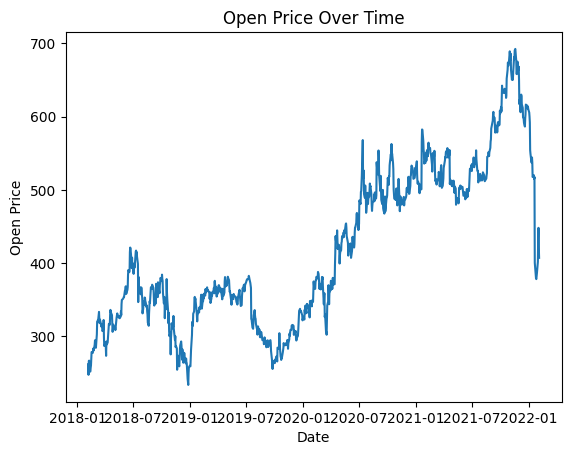

In [69]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')
plt.show()

In [70]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Print correlation matrix
print(corr_matrix)

# Check number of rows before dropping NaNs
print("Number of rows before dropna:", len(df))

df.dropna(inplace=True)  # Drop rows with missing values

# Check number of rows after dropping NaNs
print("Number of rows after dropna:", len(df))

# Check for missing values
print(df.isnull().sum())

              Date      Open      High       Low     Close  AdjClose    Volume
Date      1.000000  0.840554  0.841665  0.840878  0.841384  0.841384 -0.427661
Open      0.840554  1.000000  0.998605  0.998508  0.996812  0.996812 -0.415838
High      0.841665  0.998605  1.000000  0.998203  0.998551  0.998551 -0.400699
Low       0.840878  0.998508  0.998203  1.000000  0.998544  0.998544 -0.432116
Close     0.841384  0.996812  0.998551  0.998544  1.000000  1.000000 -0.413362
AdjClose  0.841384  0.996812  0.998551  0.998544  1.000000  1.000000 -0.413362
Volume   -0.427661 -0.415838 -0.400699 -0.432116 -0.413362 -0.413362  1.000000
Number of rows before dropna: 1009
Number of rows after dropna: 1009
Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
df.dropna(inplace=True)
corr_matrix = df.corr()
print(corr_matrix)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = (df['Date'] - df['Date'].min()).dt.days
X = df.drop(['Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

              Date      Open      High       Low     Close  AdjClose    Volume
Date      1.000000  0.840554  0.841665  0.840878  0.841384  0.841384 -0.427661
Open      0.840554  1.000000  0.998605  0.998508  0.996812  0.996812 -0.415838
High      0.841665  0.998605  1.000000  0.998203  0.998551  0.998551 -0.400699
Low       0.840878  0.998508  0.998203  1.000000  0.998544  0.998544 -0.432116
Close     0.841384  0.996812  0.998551  0.998544  1.000000  1.000000 -0.413362
AdjClose  0.841384  0.996812  0.998551  0.998544  1.000000  1.000000 -0.413362
Volume   -0.427661 -0.415838 -0.400699 -0.432116 -0.413362 -0.413362  1.000000
Mean Squared Error: 0.00


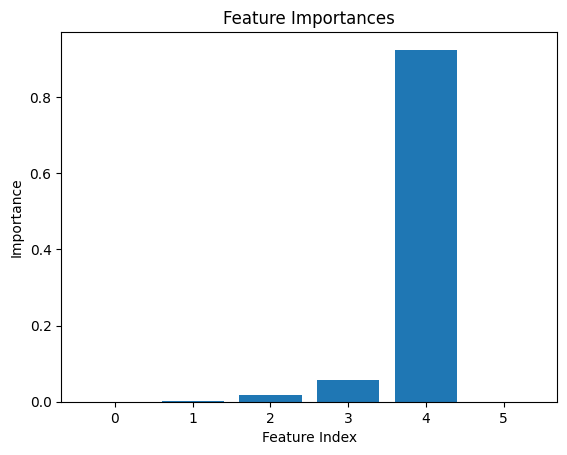

In [75]:
import matplotlib.pyplot as plt
model.fit(X, y)
# Get the feature importances
importances = model.feature_importances_

# Plot the feature importances
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Select the top features
top_features = np.argsort(importances)[::-1][:5]

# Create a new dataset with only the top features
new_data = df.iloc[:, top_features]

Epoch 1/200
25/25 [==============================] - 15s 216ms/step - loss: 0.0172 - val_loss: 0.0087
Epoch 2/200
25/25 [==============================] - 2s 95ms/step - loss: 0.0035 - val_loss: 0.0060
Epoch 3/200
25/25 [==============================] - 4s 142ms/step - loss: 0.0027 - val_loss: 0.0048
Epoch 4/200
25/25 [==============================] - 3s 130ms/step - loss: 0.0022 - val_loss: 0.0050
Epoch 5/200
25/25 [==============================] - 2s 98ms/step - loss: 0.0036 - val_loss: 0.0114
Epoch 6/200
25/25 [==============================] - 2s 97ms/step - loss: 0.0035 - val_loss: 0.0050
Epoch 7/200
25/25 [==============================] - 2s 98ms/step - loss: 0.0024 - val_loss: 0.0053
Epoch 8/200
25/25 [==============================] - 3s 119ms/step - loss: 0.0026 - val_loss: 0.0051
Epoch 9/200
25/25 [==============================] - 4s 154ms/step - loss: 0.0026 - val_loss: 0.0066
Epoch 10/200
25/25 [==============================] - 2s 99ms/step - loss: 0.0023 - val_loss: 

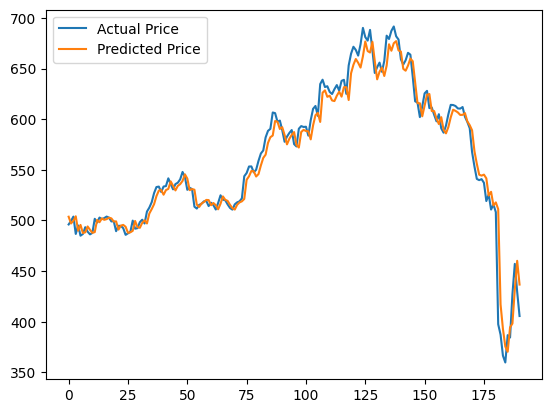

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_excel('/content/stock_prices.xlsx', index_col='Date')

# Preprocess the data
# Select the 'Close' column for analysis
data = df['Close'].values

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create a function to create datasets for the LSTM model
def create_dataset(dataset, look_back=1):
  X, Y = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    X.append(a)
    Y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(Y)

# Set the lookback period (number of previous days used to predict the next)
look_back = 10

# Create the training and testing datasets
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test), callbacks=[early_stop])

# Evaluate the model
loss = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)

# Make predictions on the test data
predictions = model.predict(X_test)

# Invert scaling to get the actual stock prices
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Plot the actual vs predicted prices
plt.plot(Y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.show()

# Save the model for future use
model.save('stock_price_prediction_model.h5')